## Exercises: An Invitation to Analytic Combinatorics in Several Variables

Created by Stephen Melczer

This notebook complements the exercises found on the [ALEA ACSV course webpage](https://melczer.ca/ALEA22/)

A quick Sage tutorial can be found [here](https://melczer.ca/files/SageIntro.html) (try an interactive version in your browser [here](https://mybinder.org/v2/git/https%3A%2F%2Fgit.uwaterloo.ca%2Fsmelczer%2Fintro-to-sage/HEAD?filepath=A%20Brief%20Introduction%20to%20Sage.ipynb)).

See [https://melczer.ca/textbook](https://melczer.ca/textbook) for further Sage notebooks solving problems in analytic combinatorics in several varibles. In particular, [this notebook](https://melczer.ca/files/TextbookCode/Chapter5/Example5-SmoothASM.ipynb) (also available as a [static HTML page](https://melczer.ca/files/TextbookCode/Chapter5/Example5-SmoothASM.html)) gives an algorithm to compute asymptotic terms. Don't use it to solve these exercises, but use it to further check your answers! (Or to compute asymptotics for other problems!)

In [1]:
# Helper function to compute the Hessian matrix M from the function H(vars)
# in the direction R at the point CP, specified by a list of substitutions.
# Copied from melczer.ca/textbook/
def getHes(H,R,vars,CP):
    dd = len(vars)
    V = zero_vector(SR,dd)
    U = matrix(SR,dd)
    M = matrix(SR,dd-1)

    for j in range(dd):
        V[j] = R[j]/R[-1]
        for i in range(dd):
            U[i,j] = vars[i]*vars[j]*diff(H,vars[i],vars[j])/vars[-1]/diff(H,vars[-1])
    for i in range(dd-1):
        for j in range(dd-1):
            M[i,j] = V[i]*V[j] + U[i,j] - V[j]*U[i,-1] - V[i]*U[j,-1] + V[i]*V[j]*U[-1,-1]
            if i == j: M[i,j] = M[i,j] + V[i]
    return M.subs(CP)


# Helper function to compute leading asymptotics of the R-diagonal of G(vars)/H(vars)
# determined by the Main Asymptotic Theorem of Smooth ACSV at the point CP, specified
# by a list of substitutions. We take det(M) as an input that can be computed by the
# above function.
var('n')
def leadingASM(G,H,detM,R,vars,CP):
    dd = len(R)
    lcoeff = -G/vars[-1]/H.diff(vars[-1])
    exp = 1/mul([vars[k]^R[k] for k in range(dd)])^n
    
    ASM = exp * (2*pi*n*R[-1])^((1-dd)/2) / sqrt(detM) * lcoeff
    return ASM.subs(CP)

These functions can be used to compute the matrix M appearing in asymptotics, as well as the leading asymptotic term in an asymptotic expansion. 

Here is an example of their use to find asymptotics for the main diagonal of $1/(1-x-y-z)$.

In [2]:
# Introduce variables x, y, and z
var('x y z')
H = 1 - x - y - z

# In the main diagonal direction this has a critical point at (1/3,1/3,1/3)
CPs = solve([H,x*diff(H,x) - y*diff(H,y), x*diff(H,x) - z*diff(H,z)],[x,y,z])
show(CPs)

[[x == (1/3), y == (1/3), z == (1/3)]]

In [3]:
# Let CP be the critical point, defined as a list [x == 1/3, y == 1/3, z == 1/3]
CP = CPs[0]

# Get the matrix M 
M = getHes(H,[1,1,1],[x,y,z],CP)
show("M = ", M)

'M = ' [2 1]
[1 2]

In [4]:
# Get and print leading asymptotics
ASM = leadingASM(1,H,M.determinant(),[1,1,1],[x,y,z],CP)
print("The dominant asymptotic behaviour of the main diagonal is")
show(ASM)

The dominant asymptotic behaviour of the main diagonal is


1/2*sqrt(3)/(pi*(1/27)^n*n)

We can check our asymptotic approximation by computing series terms.

In [5]:
# First, define the ring of formal power series (more efficient for computations)
# We use capital letters to denote the formal power series variables
P.<X,Y,Z> =  QQ[['X,Y,Z']] 

# Computes the series expansion up to precision 3*N
N = 10
ser = 1/(1-X-Y-Z + O(X^(3*N+1)))

# Check ratio of asymptotic formula to actual coefficients -- this should go to 1!
(ser.coefficients()[X^N*Y^N*Z^N]/ASM.subs(n=N)).n()

0.978030899006393

## Question 1: Delannoy Numbers
The *Delannoy number* $d_{a,b}$ is the number of paths from the origin $(0,0)$ to the point $(a,b)$ using only the steps $\textsf{N}=(0,1)$, $\textsf{E} = (1,0)$, and $\textsf{NE}=(1,1)$.

**(a)** Prove the recurrence 
$$ d_{a,b} = 
\begin{cases} 
1 &: \text{ if $a=0$ or $b=0$} \\
d_{a-1,b} + d_{a,b-1} + d_{a-1,b-1} &:\text{ otherwise}
\end{cases}
$$
Conclude that 
$$ D(x,y) = \sum_{a,b\geq0}d_{a,b}x^ay^b = \frac{1}{1-x-y-xy}. $$

**(b)** Use the Main Theorem of Smooth ACSV to find asymptotics of $d_{n,n}$ as the $(1,1)$-diagonal of $D(x,y)$. What are the critical points in the $(1,1)$ direction? Which are minimal?

**(c)** Use the Main Theorem of Smooth ACSV to find asymptotics of the $(r,s)$-diagonal of $D(x,y)$ for any $r,s>0$.

### Function to numerically compute terms in the expansion

Check your computed asymptotics against this function!

In [6]:
# First, define the ring of formal power series (more efficient for computations)
P.<X,Y> =  QQ[['X,Y']] 

# Code to compute the coefficient of x^(N*R) * y^(N*S) where R, S, and N are positive integers
R, S, N = 1, 2, 10
N2 = (R+S)*N
ser = 1/(1-X-Y-X*Y + O(X^(N2+1)))
coef = ser.coefficients()[X^(R*N)*Y^(S*N)]
print("The coefficient [x^{}y^{}]D(x,y) = {}".format(N*R,N*S,coef))

The coefficient [x^10y^20]D(x,y) = 4354393801


## Question 2: Apéry Asymptotics

Recall from lecture that a key step in Apéry's proof of the irrationality of $\zeta(3)$ is determining the exponential growth of the sequence that can be encoded as the main diagonal
of 
$$ F(x,y,z,t) = \frac{1}{1 - t(1+x)(1+y)(1+z)(1+y+z+yz+xyz)}. $$
Use the Main Theorem of Smooth ACSV to find dominant asymptotics of this sequence.

### Function to numerically compute terms in the expansion

Check your computed asymptotics against this function!

In [7]:
# Numerically compute coefficient of (xyzt)^n (can take a long time for large N)
P.<X,Y,Z> =  QQ['X,Y,Z'] 
N = 30
ser = ((1+X)*(1+Y)*(1+Z)*(1+Y+Z+Y*Z+X*Y*Z))^N
coef = ser[X^N*Y^N*Z^N]
print("The coefficient [(xyzt)^({})]F(x,y,z,t) = {}".format(N,coef))

The coefficient [(xyzt)^(30)]F(x,y,z,t) = 11320115195385966907843180411829810312080825


## Question 3: Pathological Directions
**(a)** Find asymptotics of the $(r,s)$-diagonal of $F(x,y) = \frac{1}{1-x-xy}$
for any $0<s<r$.

**(b)** What are the critical points of $F(x,y) = \frac{1}{1-x-xy}$ in the $(r,s)$ direction when $0<r \leq s$? Which are minimal? Characterize the behaviour of the $(r,s)$ diagonal when $0<r \leq s$.

### Function to numerically compute terms in the expansion

Check your computed asymptotics against this function!

In [8]:
# First, define the ring of formal power series (more efficient for computations)
P.<X,Y> =  QQ[['X,Y']] 

# Code to compute the coefficient of x^(N*R) * y^(N*S) where R, S, and N are positive integers
R, S, N = 2, 1, 10
N2 = (R+S)*N
ser = 1/(1-X-X*Y + O(X^(N2+1)))
coef = ser.coefficients()[X^(R*N)*Y^(S*N)]
print("The coefficient [x^{}y^{}]F(x,y) = {}".format(N*R,N*S,coef))

The coefficient [x^20y^10]F(x,y) = 184756


## Question 4: A Composition Limit Theorem

An *integer composition* of size $n\in\mathbb{N}$ is an ordered tuple of positive integers (of any length) that sum to $n$. A composition can be viewed as an integer partition where the order of the summands matters. Let $c_{k,n}$ denote the number of compositions of size $n$ that contain $k$ ones. 

**(a)** If you know the symbolic method, species theory, or similar enumerative constructions, prove that 
$$ C(u,x) = \sum_{n,k\geq0}c_{k,n}u^kx^n = \frac{1-x}{1-2x-(u-1)x(1-x)}. $$

**(b)** Prove that the distribution for the number of ones in a composition of size $n$ satisfies a local central limit theorem as $n\rightarrow\infty$. More precisely, find a constant $t>0$ and normal density $\nu_n(s)$ such that 
$$ \sup_{s \in \mathbb{Z}} |t^nc_{s,n} - \nu_n(s)| \rightarrow 0 $$
as $n\rightarrow\infty$.

### Function to plot series coefficients

Check your computed distribution against this function!

The following plot shows the coefficients of [x^(200)]C(u,x)


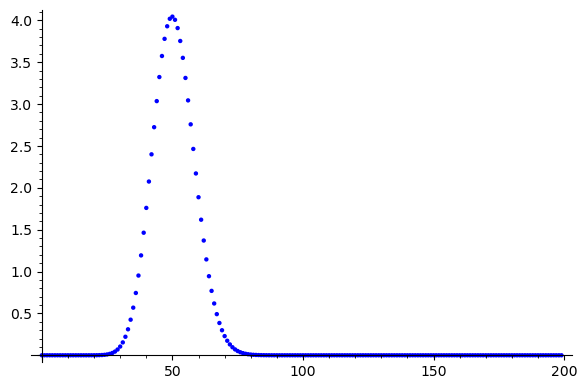

In [9]:
# Plot series terms versus computed density
K.<U> =  QQ['U']
P.<X> =  K[['X']]

# Set the value of n to test
N = 200
mser = (1 - X)/(1 - 2*X - (U-1)*X*(1-X) + O(X^(N+1)))
uvals = mser[N]

plt = point([])
for k in range(N):
    plt += point([k,uvals[k]])

print("The following plot shows the coefficients of [x^({})]C(u,x)".format(N))
plt